In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

In [3]:
df = pd.read_csv('data.csv', index_col=0)
df

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
NJ/NY Gotham FC,1,7,8,10,10,5,7,8,10,8,9,9,11,11,12
Portland Thorns,2,2,3,7,8,4,3,2,3,3,2,2,1,1,1
Angel City FC,3,6,2,2,2,7,4,6,6,5,7,7,7,7,7
Chicago Red Stars,4,4,6,6,7,3,2,3,2,2,3,4,4,6,6
Washington Spirit,5,3,7,8,9,10,8,7,9,11,11,10,10,10,11
San Diego Wave,6,1,1,1,1,1,1,1,1,1,1,1,2,3,2
North Carolina Courage,7,11,12,12,12,12,12,12,12,12,12,12,12,12,10
OL Reign,8,10,10,9,3,6,6,5,4,4,6,5,6,5,5
Racing Louisville,9,9,9,3,5,8,9,9,8,10,10,11,9,9,9
Houston Dash,10,5,4,4,4,2,5,4,5,6,4,3,3,2,3


In [28]:
colors = {
    'NJ/NY Gotham FC': '#000000',
    'Portland Thorns': '#97262c',
    'Angel City FC': '#000000',
    'Chicago Red Stars': '#3cb5e4',
    'Washington Spirit': '#c20032',
    'San Diego Wave': '#011e40',
    'North Carolina Courage': '#00416b',
    'OL Reign': '#002f87',
    'Racing Louisville': '#c5b4e1',
    'Houston Dash': '#ff6a01',
    'Orlando Pride': '#60269e',
    'Kansas City Current': '#62cac9',
}
text = {
    'NJ/NY Gotham FC': '#ffffff',
    'Portland Thorns': '#ffffff',
    'Angel City FC': '#ffffff',
    'Chicago Red Stars': '#000000',
    'Washington Spirit': '#ffffff',
    'San Diego Wave': '#ffffff',
    'North Carolina Courage': '#ffffff',
    'OL Reign': '#ffffff',
    'Racing Louisville': '#000000',
    'Houston Dash': '#000000',
    'Orlando Pride': '#ffffff',
    'Kansas City Current': '#000000',
}

In [29]:
# Add extra columns as backdrop for team names
week=15
extra=3
for i in range(1, extra + 1):
    df[str(week+i)] = df[str(week)]

In [34]:
# Sort so top teams have lines drawn on top
df = df.sort_values(by=[str(week)], ascending=False)

<Figure size 28800x16200 with 0 Axes>

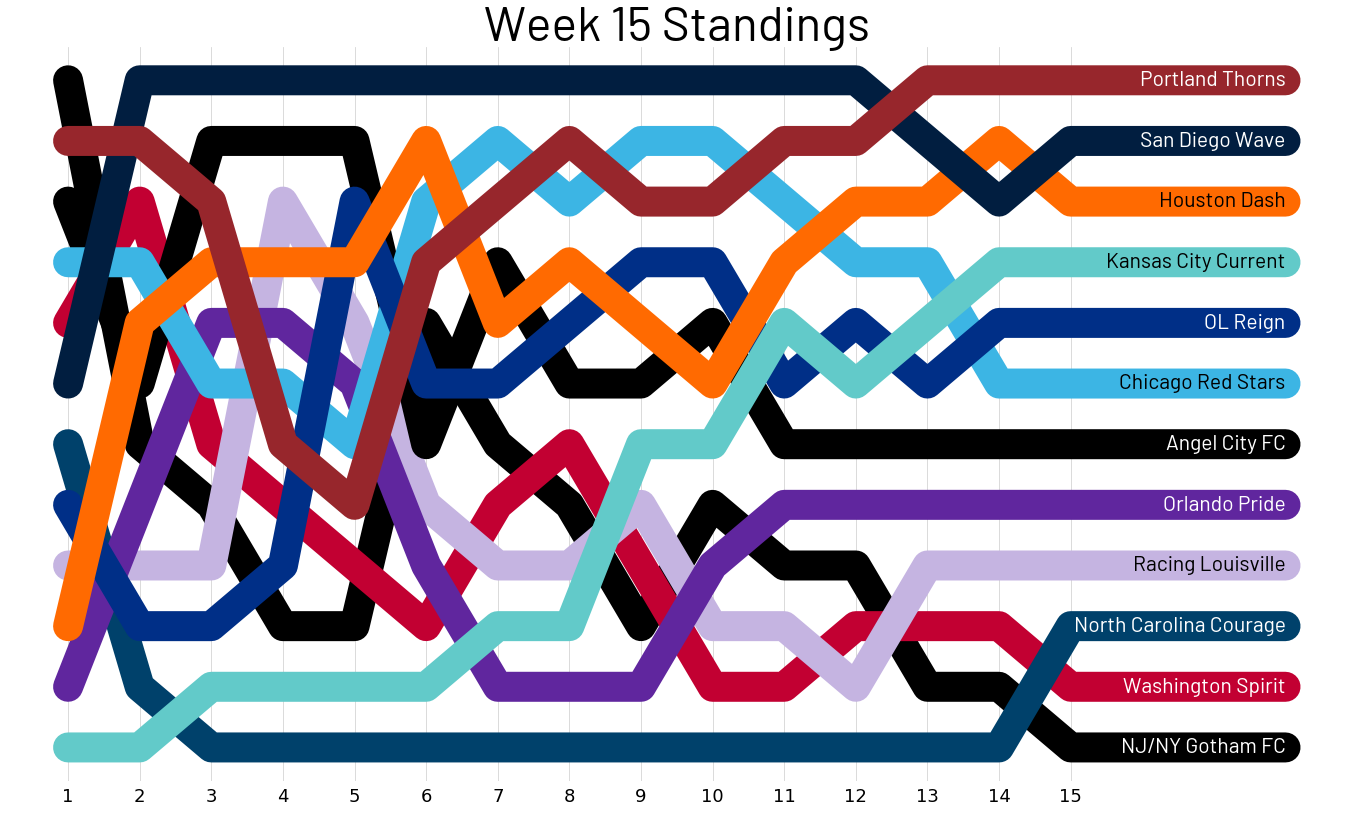

In [35]:
barlow = fm.FontProperties(fname='/home/agale/nwsl-analytics/nwsl-rank/Barlow.otf')
plt.rcParams['figure.figsize'] = (24, 13.5)
plt.figure(dpi=1200)
fig, ax = plt.subplots()

# Plot lines
for team in df.index:
    ax.plot(
        df.columns,
        df.loc[team],
        linewidth=30,
        color=colors[team],
        solid_capstyle='round'
    )
    
    ax.text(
        week+2, 
        df.at[team, str(week)], 
        team, 
        color=text[team], 
        fontsize=21, 
        fontproperties=barlow,
        fontweight='bold',
        va='center',
        ha='right'
    )

# Title
plt.title('Week 15 Standings', fontproperties=barlow, size=48)
    
# General
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.tick_params(bottom=False, left=False)
ax.set_axisbelow(True)

# y-axis
fig.gca().invert_yaxis()
ax.set_yticks([])
ax.yaxis.grid(False)

# x-axis
ax.set_xticks(range(0, week))
ax.xaxis.grid(True, color='lightgray')
ax.tick_params(axis='x', which='major', labelsize=18)

# Save image
plt.savefig('week15.png', bbox_inches='tight')